In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from skimage.feature import hog
from sklearn import datasets
from sklearn.preprocessing import LabelBinarizer
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix

In [71]:
os.chdir(r'D:\Kuliah\Machine Vision\EMNIST dataset')

In [72]:
train_data = pd.read_csv('emnist-bymerge-train1000.csv')
test_data = pd.read_csv('emnist-bymerge-test1000.csv')

In [73]:
#train data
train_image = np.array(train_data.iloc[:,1:].values)
train_labels = np.array(train_data.iloc[:,0].values)

#test data
test_image = np.array(test_data.iloc[:,1:].values)
test_labels = np.array(test_data.iloc[:,0].values)


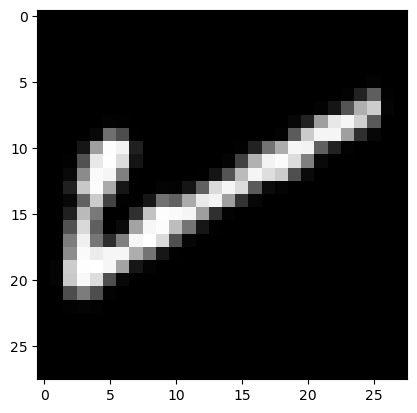

In [74]:
plt.imshow(train_image[2].reshape(28,28),cmap='gray')

In [75]:
train_labels[2]

7

In [76]:
def rotate(image):
    image = image.reshape([28,28])
    image = np.fliplr(image)
    image = np.rot90(image)
    return image

x_train = np.apply_along_axis(rotate,1,train_image)
x_test = np.apply_along_axis(rotate,1,test_image)


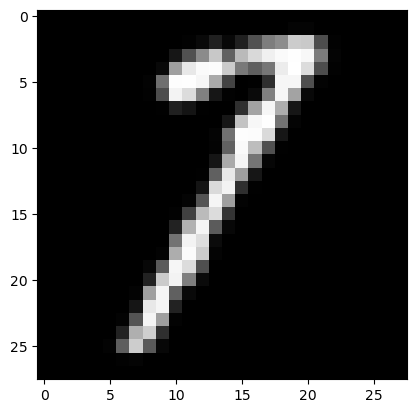

In [77]:
plt.imshow(x_train[2].reshape(28,28),cmap='gray')

HOG Feature Extraction Test

In [78]:
feature,hog_image = hog(train_image[2].reshape(28,28),orientations=9,pixels_per_cell=(8,8),cells_per_block=(2,2),visualize=True,block_norm='L2')

In [79]:
feature.shape

(144,)

<BarContainer object of 144 artists>

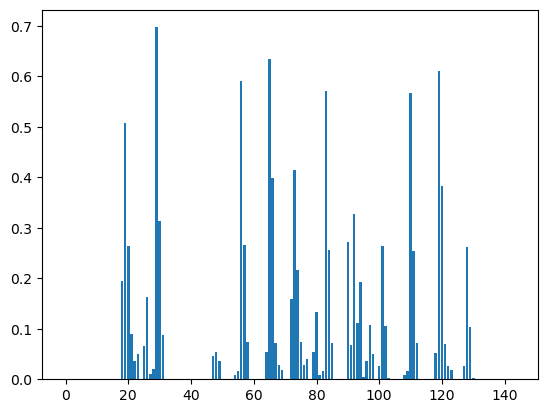

In [80]:
plt.bar(list(range(feature.shape[0])),feature)

In [81]:
feature,hog_image = hog(train_image[1].reshape(28,28),orientations=9,pixels_per_cell=(8,8),cells_per_block=(2,2),visualize=True,block_norm='L2')

<BarContainer object of 144 artists>

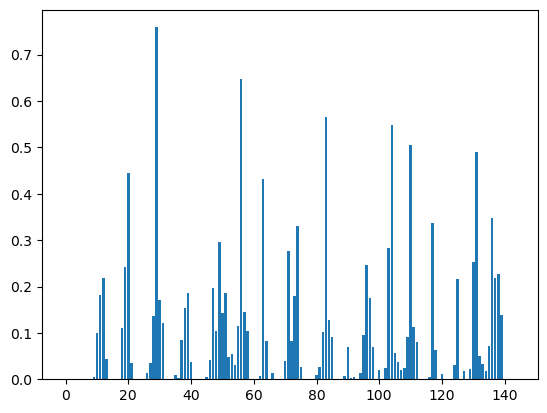

In [82]:
plt.bar(list(range(feature.shape[0])),feature)

Pre-processing using HOG Feature Extraction

In [83]:
n_dims = feature.shape[0]

In [84]:
n_samples = train_image.shape[0]

In [85]:
n_samples

999

In [86]:
x_train,y_train = datasets.make_classification(n_samples=n_samples,n_features=n_dims)

HOG feature extraction for train image

In [87]:
for i in range(n_samples):
    x_train[i] = hog(train_image[i].reshape(28,28),orientations=9,pixels_per_cell=(8,8),cells_per_block=(2,2),block_norm='L2')
    y_train[i] = train_labels[i]

In [88]:
lb = LabelBinarizer()
lb.fit(y_train)

LabelBinarizer()

In [89]:
y_train_one_hot = lb.transform(y_train)
label = lb.inverse_transform(np.array([y_train_one_hot[7]]))
y_train_one_hot[7]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [90]:
label[0]

24

Preprocessing using HOG feature Extraction

In [91]:
X_test, y_test = datasets.make_classification(n_samples=n_samples, n_features=n_dims)

Hog feature extraction for test image

In [92]:
for i in range (n_samples):
    X_test[i], _ = hog(test_image[i].reshape(28,28), orientations=9, pixels_per_cell=(8,8), cells_per_block=(2,2), visualize = True, block_norm='L2')
    y_test[i] = test_labels [i]

In [93]:
y_test_one_hot = lb.transform(y_test)
y_test_one_hot[6]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [94]:
label = lb.inverse_transform(np.array([y_test_one_hot[6]]))
label[0]

23

Support Vector Machine Classifier

In [95]:
svm_model = SVC(kernel = 'rbf', C=10, gamma='scale', random_state = 42)
svm_model.fit(x_train, y_train)

SVC(C=10, random_state=42)

Performance Evaluation using Leave One Out Cross Validation 

In [96]:
cv = LeaveOneOut()
y_true, y_pred = [], []

In [102]:
for train_index, test_index in cv.split(x_train):
    #data splitting
    X_train_fold, X_test_fold = x_train[train_index], x_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

    #train and predict
    svm_model.fit(X_train_fold, y_train_fold)
    y_pred_test = svm_model.predict(X_test_fold)

    #result collecting
    y_true.append(y_test_fold)
    y_pred.append(y_pred_test)

In [ ]:
loo_accuracy = accuracy_score(y_true, y_pred)
loo_precision = precision_score(y_true, y_pred, average='macro')
loo_f1 = f1_score(y_true, y_pred, average='macro')
loo_conf_matrix = confusion_matrix(y_true, y_pred)

print("LOOCV Accuracy (Train):", accuracy)
print("LOOCV Precision (Train):", precision)
print("LOOCV F1-Score (Train):", f1)
print("LOOCV Confusion Matrix (Train):\n", conf_matrix)

LOOCV Accuracy (Train): 0.5995995995995996
LOOCV Precision (Train): 0.6122171427503714
LOOCV F1-Score (Train): 0.6019400364213341
LOOCV Confusion Matrix (Train):
 [[ 9  0  0 ...  0  0  0]
 [ 0 10  0 ...  0  0  1]
 [ 0  0 16 ...  1  0  0]
 ...
 [ 0  0  0 ...  4  0  0]
 [ 0  0  0 ...  0 14  0]
 [ 0  0  0 ...  0  0 14]]


In [99]:
svm_model.fit(x_train, train_labels)
y_test_pred = svm_model.predict(X_test)
test_accuracy = accuracy_score(test_labels, y_test_pred)
test_precision = precision_score(test_labels, y_test_pred, average = 'macro')
test_f1 = f1_score(test_labels, y_test_pred, average = 'macro')
test_conf_matrix = confusion_matrix(test_labels, y_test_pred)

print("\nTest Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test F1-Score:", test_f1)
print("Test Confusion Matrix:\n", test_conf_matrix)


Test Accuracy: 0.6216216216216216
Test Precision: 0.6339703899649317
Test F1-Score: 0.6200893485459124
Test Confusion Matrix:
 [[ 9  1  0 ...  0  0  0]
 [ 0 12  0 ...  0  0  0]
 [ 0  0 19 ...  0  0  0]
 ...
 [ 1  0  0 ...  7  0  0]
 [ 0  0  0 ...  0 12  1]
 [ 0  0  0 ...  0  0 16]]
